# gibbs animate

## import module

In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt
from math import sqrt, log, sin, cos, pi
import numpy as np 
from numpy.random import rand,seed

## parameter

In [2]:
b=0.8
x=10.0
y=3.0
times=200 
np.random.seed(12345)

## show static output

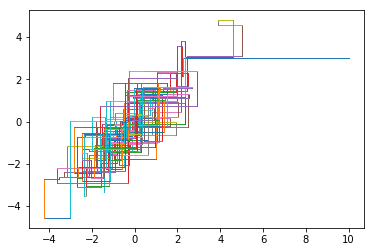

In [3]:
fig,ax=plt.subplots()
for _ in range(times):
    u1 = rand()
    u2 = rand()
    x_old = x
    x = sqrt(-2*log(u1))*cos(2*pi*u2) + b*y
    ax.plot([x_old, x], [y, y], lw=1)
    y_old = y
    y = sqrt(-2*log(u1))*sin(2*pi*u2) + b*x
    ax.plot([x, x], [y_old, y], lw=1)

## animation using FuncAnimation

In [4]:
import base64
from IPython.display import HTML
import matplotlib.animation as animation
import os 
GIF_TAG = """<img src="data:image/gif;base64,{0}" alt="some_text">"""

In [5]:
def get_giftag(outputfile):
    with open(outputfile, "rb") as imagefile:
        encoded_string = base64.b64encode(imagefile.read())
        tag = GIF_TAG.format(encoded_string.decode("utf-8"))
    return tag 

In [6]:
fig,ax=plt.subplots()
ax.set_xlim(-4,10)
ax.set_ylim(-4,4)

b=0.8
x=10.0
y=3.0
times=200 
    
def update(data,*fargs):
    fig,ax=fargs
    global x,y
    u1 = rand()
    u2 = rand()
    x_old=x
    x = sqrt(-2*log(u1))*cos(2*pi*u2) + b*y
    ax.plot([x_old, x], [y, y], lw=1)
    y_old = y
    y = sqrt(-2*log(u1))*sin(2*pi*u2) + b*x
    ax.plot([x, x], [y_old, y], lw=1)
    ax.set_title("{}".format(data))

ani=animation.FuncAnimation(fig,update,interval=100,fargs=(fig,ax))

outputfile="images/output.gif"

if not os.path.exists(os.path.dirname(outputfile)):
    os.mkdir(os.path.dirname(outputfile))
    
ani.save(outputfile, writer="imagemagick")
plt.close(ani._fig)

## Display gif


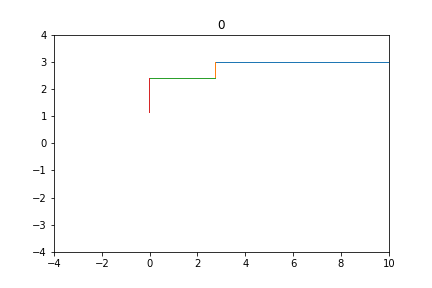

In [7]:
HTML(get_giftag(outputfile))